In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("PGT121_Neu_OccAA.csv", header =0)

In [3]:
Y = data.values[:, 1]
features = data.values[:, 5:]
labels = data.columns.values[5:]
filter_mask = np.where(np.all(features == features[0,:], axis = 0))
X = np.delete(features, filter_mask, axis = 1)
labels = np.delete(labels, filter_mask)
names = data.values[:, 3]
ids = data.values[:, 0]

In [4]:
from sklearn.cluster import *
import matplotlib.pyplot as plt
%matplotlib notebook 
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import plotly.plotly as py
import plotly

import plotly
print(plotly.__version__)
plotly.offline.init_notebook_mode()

2.0.15


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [5]:
plotly.tools.set_credentials_file(username='skyli42', api_key= 'VZw23qaHL5LXf2GPvjtw')


In [6]:
def plot_3D(X, labels):
#     X_3D = PCA(n_components = 3).fit_transform(X)
    fig = plt.figure()
    ax = Axes3D(fig, elev=-150, azim=110)
    ax.scatter(X_3D[:, 0],X_3D[:, 1], X_3D[:, 2], c = labels, s = 5)
    plotly_fig = tls.mpl_to_plotly(fig)
    unique_url = py.plot(plotly_fig)
    return unique_url

In [7]:
def plot_2D(X, labels):
    X_2D = PCA(n_components =2).fit_transform(X)
    fig, ax = plt.subplots()
    ax.scatter(X_2D[:, 0], X_2D[:, 1], c = labels, s = 20)

In [8]:
import plotly.graph_objs as go
def plotly_3d(X, labels):
    scatter = go.Scatter3d(
        x = X[:, 0],
        y = X[:, 1],
        z = X[:, 2],
        mode = 'markers',
        marker = dict(
            size = 5,
            color = labels,
            colorscale = 'Viridis',
            opacity = 1
        )
    )
    data = [scatter]
#     print(data)
    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    fig = go.Figure(data=data, layout=layout)
    plotly.offline.plot(fig, filename='groups.html')

In [24]:
X_3D = PCA(n_components = 3).fit_transform(X)
labs = np.zeros(X_3D.shape[0])
labs[X_3D[:, 1]>15] = 0
labs[np.logical_and(np.logical_and(X_3D[:, 0]<0,X_3D[:, 2]<=2) , X_3D[:, 2]>=-2)] = 1
labs[np.logical_and(X_3D[:, 2]>0, X_3D[:, 0]>0)] = 2
labs[np.logical_and(X_3D[:, 1]<5, np.logical_and(X_3D[:, 2]<0, X_3D[:, 0]>0))] = 3

In [25]:
plotly_3d(X_3D, labs)

In [11]:
group1_mask = X_3D[:, 1]>15
group2_mask = np.logical_and(np.logical_and(X_3D[:, 0]<0,X_3D[:, 2]<=2) , X_3D[:, 2]>=-2)
group3_mask = np.logical_and(X_3D[:, 2]>0, X_3D[:, 0]>0)
group4_mask = np.logical_and(X_3D[:, 1]<5, np.logical_and(X_3D[:, 2]<0, X_3D[:, 0]>0))

In [12]:
name_groups = []
name_groups.append(list(names[group1_mask]))
name_groups.append(list(names[group2_mask]))
name_groups.append(list(names[group3_mask]))
name_groups.append(list(names[group4_mask]))

In [13]:
id_groups = []
id_groups.append(list(ids[group1_mask]))
id_groups.append(list(ids[group2_mask]))
id_groups.append(list(ids[group3_mask]))
id_groups.append(list(ids[group4_mask]))

In [14]:
import json

In [26]:
with open("cluster_ids.txt", 'w') as f:
    f.write(json.dumps(id_groups))

In [43]:
from collections import Counter
Counter(np.argmax(PCA(n_components = 3).fit(X).components_, axis = 1))

Counter({2959: 1, 5510: 1, 5638: 1})

In [139]:
comps = PCA(n_components=3).fit(X).components_
n = 200

In [140]:
ind = np.argpartition(comps, -n,axis = 1)[:,-n:]

In [150]:
counts = [c for c in Counter(ind.flatten()).most_common() if c[1] > 1]
counts

[(5291, 3),
 (297, 3),
 (5585, 3),
 (5638, 3),
 (1697, 3),
 (1757, 3),
 (3078, 2),
 (5152, 2),
 (5175, 2),
 (1131, 2),
 (3211, 2),
 (2192, 2),
 (4241, 2),
 (164, 2),
 (5285, 2),
 (2215, 2),
 (1204, 2),
 (5317, 2),
 (5348, 2),
 (5356, 2),
 (3317, 2),
 (3329, 2),
 (3351, 2),
 (2332, 2),
 (312, 2),
 (4451, 2),
 (371, 2),
 (3449, 2),
 (4509, 2),
 (5535, 2),
 (1454, 2),
 (4530, 2),
 (4543, 2),
 (2163, 2),
 (5589, 2),
 (5596, 2),
 (4578, 2),
 (1529, 2),
 (5628, 2),
 (530, 2),
 (538, 2),
 (3634, 2),
 (3640, 2),
 (4666, 2),
 (2457, 2),
 (5394, 2),
 (3695, 2),
 (2154, 2),
 (2499, 2),
 (1481, 2),
 (2832, 2),
 (4944, 2),
 (2941, 2),
 (5000, 2),
 (2959, 2),
 (3989, 2),
 (5034, 2),
 (3006, 2),
 (5088, 2),
 (5104, 2)]

In [142]:
def sorted_by_len(arr):
    return sorted(sorted(arr), key = len)

In [143]:
lab_to_ind = {}

for index in counts:
    lab_to_ind[labels[index[0]]] = index[0]

In [144]:
sorted_features = sorted(
    sorted_by_len(
        labels[np.array(list(zip(*counts))[0])]), 
        key = lambda x:Counter(ind.flatten())[lab_to_ind[x]], 
        reverse = True
)

In [145]:
ind_to_count = dict([c for c in Counter(ind.flatten()).most_common() if c[1] > 1])

In [146]:
sorted_features

['N334',
 'N824',
 'Pos47_D',
 'Pos277_I',
 'Pos283_N',
 'Pos825_W',
 'N130',
 'N354',
 'N363',
 'N465',
 'Pos21_I',
 'Pos49_E',
 'Pos63_T',
 'Pos102_E',
 'Pos106_T',
 'Pos174_S',
 'Pos183_Q',
 'Pos230_D',
 'Pos232_E',
 'Pos240_K',
 'Pos333_V',
 'Pos334_N',
 'Pos336_T',
 'Pos337_E',
 'Pos348_Q',
 'Pos360_I',
 'Pos363_N',
 'Pos412_D',
 'Pos429_R',
 'Pos432_Q',
 'Pos442_V',
 'Pos453_I',
 'Pos465_N',
 'Pos492_E',
 'Pos496_V',
 'Pos500_R',
 'Pos518_L',
 'Pos565_L',
 'Pos567_K',
 'Pos583_V',
 'Pos629_L',
 'Pos665_K',
 'Pos705_I',
 'Pos720_H',
 'Pos722_H',
 'Pos723_H',
 'Pos726_E',
 'Pos741_G',
 'Pos781_T',
 'Pos788_L',
 'Pos792_G',
 'Pos798_N',
 'Pos800_L',
 'Pos805_R',
 'Pos809_I',
 'Pos824_G',
 'Pos829_V',
 'Pos832_I',
 'Pos833_G',
 'Pos837_G']

In [11]:
af = AffinityPropagation().fit(X)
cluster_centers_indices = af.cluster_centers_indices_
af_labels = af.labels_

n_clusters_ = len(cluster_centers_indices)
print(n_clusters_)

49


In [18]:
import plotly
print(plotly.__version__)
plotly.offline.init_notebook_mode()

2.0.11


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [22]:
import plotly.tools as tls


<IPython.core.display.Javascript object>


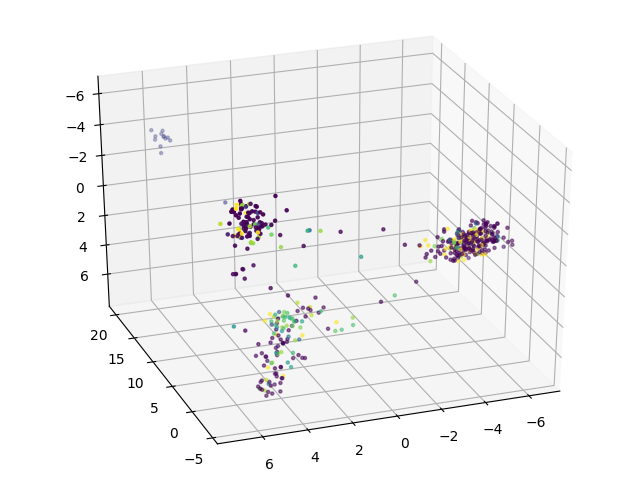

In [23]:
plot_3D(X, Y)

<IPython.core.display.Javascript object>


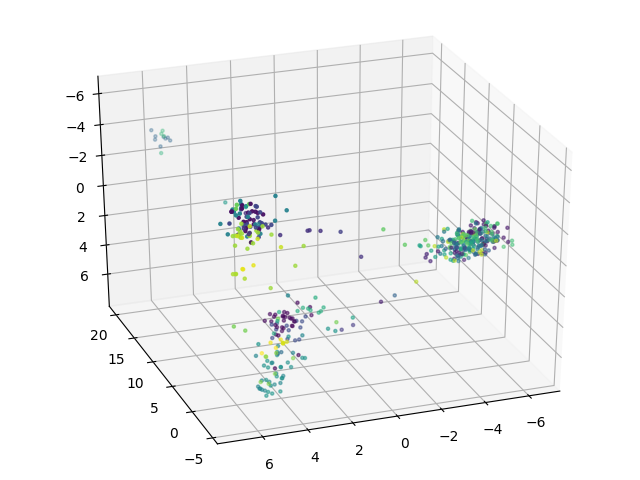

In [12]:
plot_3D(X, af_labels)

<IPython.core.display.Javascript object>


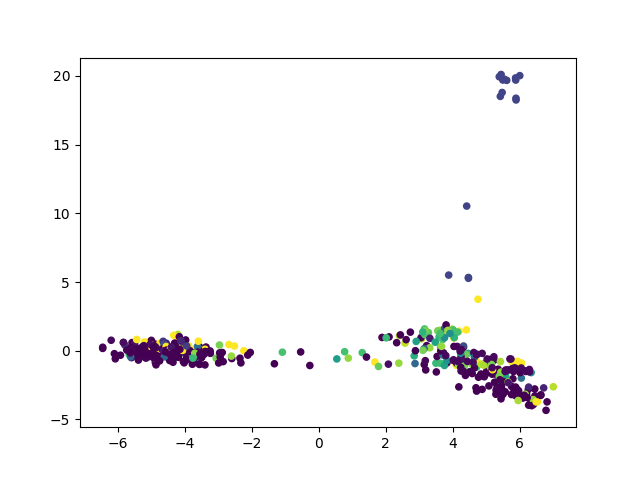

In [15]:
plot_2D(X, Y)

<IPython.core.display.Javascript object>


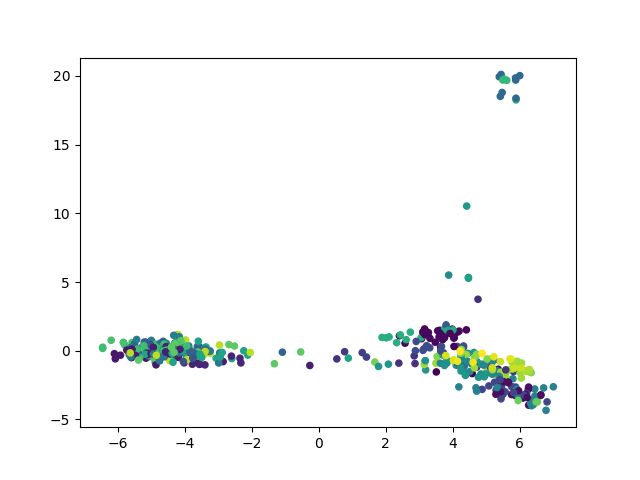

In [12]:
plot_2D(X, af_labels)

In [16]:
mean_shift = MeanShift().fit(X)
mean_labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_
print(len(cluster_centers))

6


In [24]:
mean_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

<IPython.core.display.Javascript object>


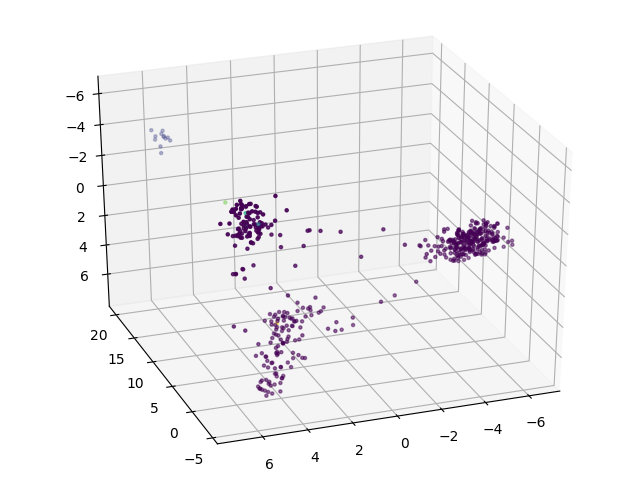

In [19]:
plot_3D(X, mean_labels)

<IPython.core.display.Javascript object>


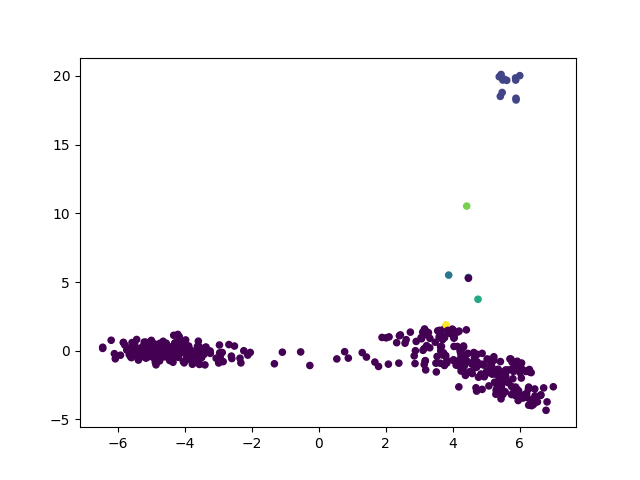

In [20]:
plot_2D(X, mean_labels)

In [21]:
spec_clust = SpectralClustering(n_clusters = 4).fit(X)
spec_labels = spec_clust.labels_

<IPython.core.display.Javascript object>


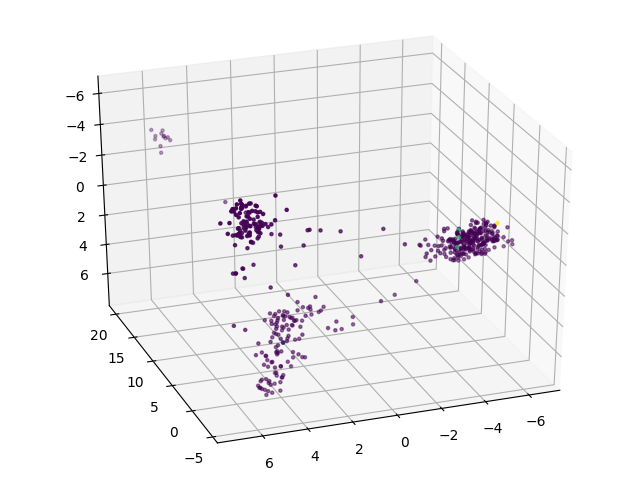

In [22]:
plot_3D(X, spec_labels)

<IPython.core.display.Javascript object>


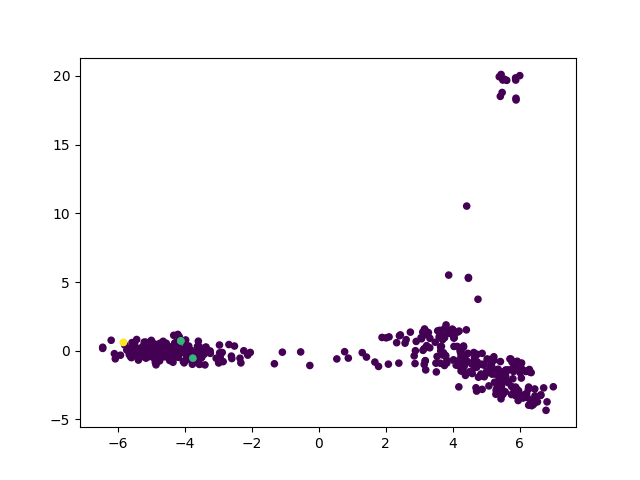

In [23]:
plot_2D(X, spec_labels)

<IPython.core.display.Javascript object>


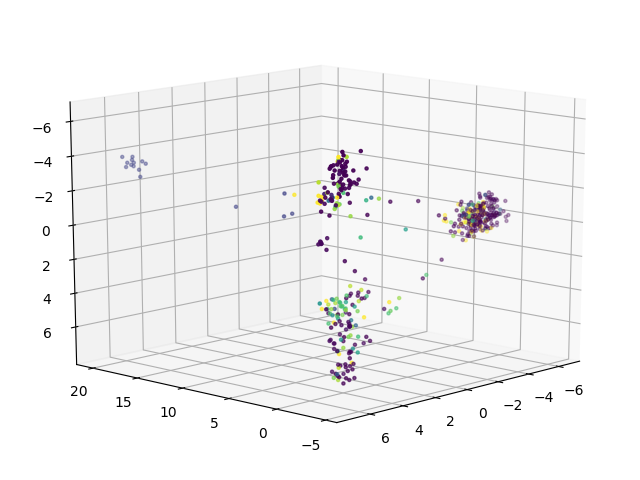

In [25]:
plot_3D(X, Y)